# Проект №5. Анализ бизнес-показателей
В маркетинговом отделе развлекательного приложения Procrastinate Pro + наблюдаются убытки, несмотря на огромные вложения в рекламу. 

Цель работы

Выяснить, почему несмотря на большие вложения компания терпит убытки и найти решение, которое поможет выйти в плюс. 
Краткое содержание:
- Предобработка. Удаление пропусков и дубликатов
- Создание функций
- Исследовательский анализ.
- Маркетинговый анализ
- Общий вывод
- Рекомендации для отдела маркетинга

Описание данных:

В моём распоряжении три датасета. visits_info_short.csv хранит логи сервера с информацией о посещениях сайта, orders_info_short.csv - информацию о заказах, а costs_info_short.csv - информацию о затратах на рекламу.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Датасет visits хранит логи сервера с информацией о посещениях сайта. Столбец User Id содержит уникальные идентификаторы пользователя, Region - страну пользователя, Device - тип устройства пользователя, Channel - идентификатор источника перехода, Session Start - дату и время начала сессии, Session End - дату и время окончания сессии. 

In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Датасет orders содержит данные о заказах. В столбце User Id - уникальные идентификаторы пользователей, Event Dt - дату и время покупки, Revenue - сумму заказа. 

In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Датасет costs содержит данные о расходах на рекламу. В столбце dt дата проведения рекламной кампании, Channel - идентификатор рекламного источника, costs - расходы на эту кампанию.

Все датасеты успешно импортированы. Первое, что необходимо сделать - исправить названия столбцов в датасетах для удобства дальнейшей работы. Они написаны с использованием заглавных букв и пробелов, это может осложнить работу. Также нужно проверить датасеты на наличие дубликатов и пропусков и убедиться, что данные в них находятся в нужном формате. Для этого используем функцию для предобработки. 

In [5]:
def fix_and_check (dataset):
    dataset.columns = [x.lower().replace(' ', '_') for x in dataset.columns]
    dataset.columns
    print('Пропуски: ')
    print(dataset.isna().sum())
    print('*'*50)
    print('Дубликаты: ')
    print(dataset.duplicated().sum())
    print('*'*50)
    print('Типы данных: ')
    print(dataset.dtypes)
    return dataset

In [6]:
visits = fix_and_check(visits)

Пропуски: 
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
**************************************************
Дубликаты: 
0
**************************************************
Типы данных: 
user_id           int64
region           object
device           object
channel          object
session_start    object
session_end      object
dtype: object


В датасете visits нет пропусков и дубликатов. Функция также исправила названия столбцов. 

In [7]:
orders = fix_and_check(orders)

Пропуски: 
user_id     0
event_dt    0
revenue     0
dtype: int64
**************************************************
Дубликаты: 
0
**************************************************
Типы данных: 
user_id       int64
event_dt     object
revenue     float64
dtype: object


В датасете orders также не обнаружено пропусков и дубликатов и исправлены названия столбцов. 

In [8]:
costs = fix_and_check(costs)

Пропуски: 
dt         0
channel    0
costs      0
dtype: int64
**************************************************
Дубликаты: 
0
**************************************************
Типы данных: 
dt          object
channel     object
costs      float64
dtype: object


И в последнем датасете также нет пропусков или дубликатов и все названия столбцов приведены к удобному формату.

Столбцы session_start и session_end датасета visits хранят данные о времени начала и конца пользовательских сессий. Необходимо перевести их к правильному типу. 

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [10]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

Проверим, все ли изменения вступили в силу:

In [11]:
visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

Проверим и другие датасеты.

In [12]:
orders.dtypes

user_id       int64
event_dt     object
revenue     float64
dtype: object

Столбец event_dt также хранит данные о времени события: его необходимо привести к правильному типу. 

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [15]:
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

В столбце dt данные о дате проведения рекламной кампании: необходимо привести их к верному типу. 

In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [17]:
costs.dtypes

dt         datetime64[ns]
channel            object
costs             float64
dtype: object

Теперь, после предобработки, данные находятся в удобном для расчётов формате, столбцы имеют более удобные названия, дубликатов или пропусков не обнаружено. Можно приступать к расчётам.

### Промежуточный вывод
В ходе предобработки были исправлены типы данных, приведены к удобному формату названия столбцов, данные проверены на наличие дубликатов и пропусков. 

## Создание функций для дальнейших расчётов

Необходимо рассчитать важнейшие маркетинговые показатели. Для этого создадим функции, которые помогут сделать расчёты. 

В первую очередь необходимо создать профили пользователей: в дальнейшем они будут использоваться для анализа. 

In [18]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Коэффициент удержания, или Retention Rate, показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть повторно использовали продукт или услугу в последующие периоды. 

In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Конверсия, или CR - показатель, отображающий, сколько пользователей перешло из одного состояния в другое. Например, сколько пользователей совершили покупку.

In [20]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

LTV, или Lifetime Value, — это общая сумма денег, которые клиент приносит космании со всех своих покупок за время пользования продуктом. 

ROI, или Return On Investment - окупаемость инвестиций. Показывает, насколько LTV превышает CAC - ещё один показатель, который потребуется рассчитать, Customer Acquisition Cost, стоимость привлечения одного клиента. 

Функция ниже рассчитает одновременно и LTV, и ROI. 

In [21]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Также для анализа понадобятся графики для визуализации.

Функция filter_data поможет сгладить фреймы и отфильтровать данные, чтобы избежать шумов. 

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция plot_retention, plot_conversion и plot_ltv_roi помогут визуализировать данные.

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Получим профили пользователей. Вызовем функцию get_profiles, и передадим ей данные.

In [26]:
min_date = datetime(2020, 5, 1)
max_date = datetime(2020, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []

for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]

# создаём датафрейм с тратами на рекламу по дням
daily_costs = pd.DataFrame(costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

profiles = get_profiles(visits, orders, costs, daily_costs) 
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Необходимо установить момент и горизонт анализа данных. В датафреймах приведены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. 

In [27]:
observation_date = datetime(2019, 10, 27).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Теперь. когда все исходные данные подготовлены, можно приступить к расчётам. В первую очередь необходимо выяснить, из каких стран пользователи приходят в приложение и как много среди них платящих пользователей. 

In [28]:
profiles.groupby('region')['user_id'].count().sort_values(ascending=False)

region
United States    100002
UK                17575
France            17450
Germany           14981
Name: user_id, dtype: int64

Больше всего новых пользователей пришло из США. 

In [29]:
profiles.groupby('region').agg({'user_id' : 'count', 'payer' : 'mean'}).sort_values(by = 'payer', ascending=False)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Среди пользователей наиболее платящий регион - США.

In [30]:
profiles.groupby('device')['user_id'].count().sort_values(ascending=False)

device
iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: user_id, dtype: int64

Основная часть пользователей используют iPhone. 

In [31]:
profiles.groupby('device').agg({'user_id' : 'count', 'payer' : 'mean'}).sort_values(by = 'payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


И платящих пользователей больше всего среди пользователей продукции Apple: Mac и iPhone.

In [32]:
profiles.groupby('channel')['user_id'].count().sort_values(ascending=False)

channel
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: user_id, dtype: int64

Большинство пользователей пришли сами: самый популярный канал привлечения - organic. На втором месте источник FaceBoom.

In [33]:
profiles.groupby('channel').agg({'user_id' : 'count', 'payer' : 'mean'}).sort_values(by = 'payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Самые платящие пользователи пришли из Faceboom, а вот органические пользователи, которых больше всего, имеют конверсию в 6 раз ниже. Это связано с тем, что при закупке рекламы каналы оптимизируют дл привлечения наиболее конвертируемой и платящей аудитории, в то время как органические пользователи могут быть разными. 

### Промежуточный вывод
- Больше всего новых пользователей в приложение пришло из США, а в этом же регионе наиболее высокая доля платящих пользователей. 
- Большинство пользователей используют iPhone, большинство платящих пользователей используют iPhone и Mac. Любопытно, что по количеству пользователей Mac меньше всего - 30 042, почти в два раза меньше, чем пользователей iPhone, но доля платящих пользователей даже немного выше.
- Больше всего пользователей были привлечены органически, но конверсия у них самая низкая. Самые платящие пользователи пришли через канал FaceBoom.

# Маркетинговый анализ 

Рассчитаем общую сумму расходов на маркетинг и распределение трат по рекламным источникам.

In [34]:
costs['costs'].sum()

105497.30000000002

In [35]:
costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by = 'costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего затрат ушло на источник TipTop. Этот источник на третьем месте по количеству привлечённых пользователей и на четвёртом месте по конверсии.

Чтобы построить визуализацию динамики изменения расходов во времени по неделям и месяцам, сначала необходимо добавить в таблицу costs столбцы с месяцами и неделями. 

In [36]:
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

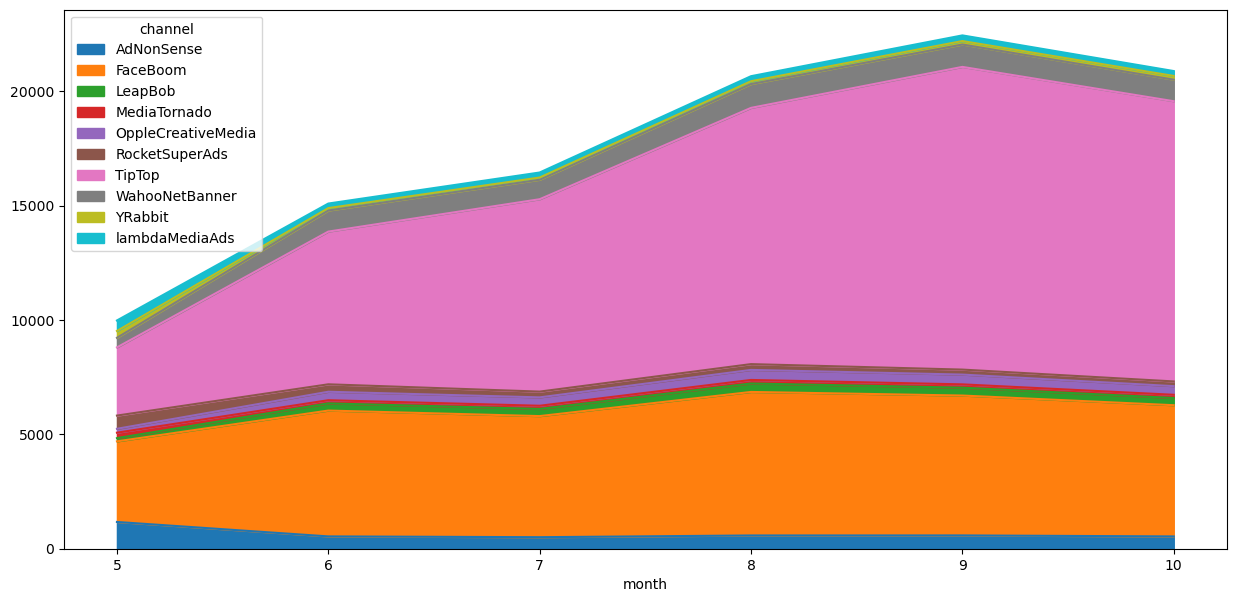

In [37]:
costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(kind = 'area', stacked = True, figsize = (15,7));

<AxesSubplot:xlabel='week'>

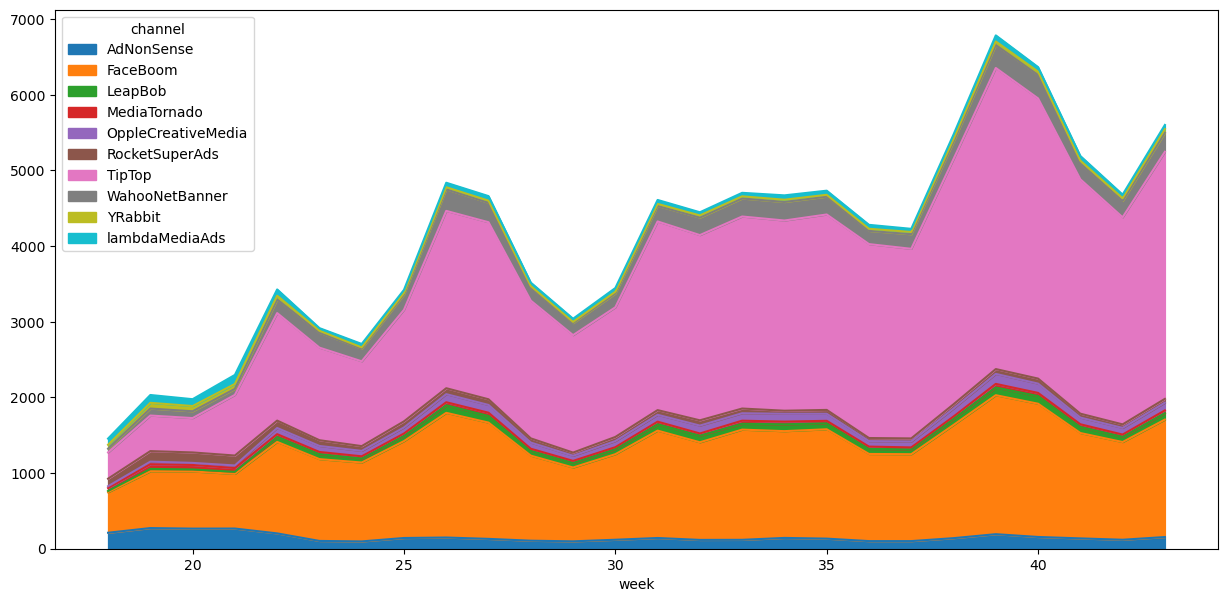

In [38]:
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(kind = 'area', stacked = True, figsize = (15,7))

Судя по графику, самые большие инвестиции на протяжении всего исследованного периода получает TipTop. На втором месте Faceboom - и это положительная новость, ведь он приносит лучшие конверсии и больше всего пользователей.

### Промежуточный вывод
Всего на маркетинг затрачено 105 497. Инвестиции распределяются достаточно неравномерно, наибольшие финансовые вливания получает платформа TipTop. На втором месте FaceBoom. 

## Оценка окупаемости рекламы

Для расчёта окупаемости рекламы исключим из исследуемого датафрейма пользователей, привлечённых органически: их данные никак не помогут понять окупаемость, но могут исказить статистику. 

In [39]:
profiles = profiles.loc[profiles['channel'] != 'organic']

Для начала при помощи заранее рассчитанной функции посчитаем и визуализируем LTV и ROI. 

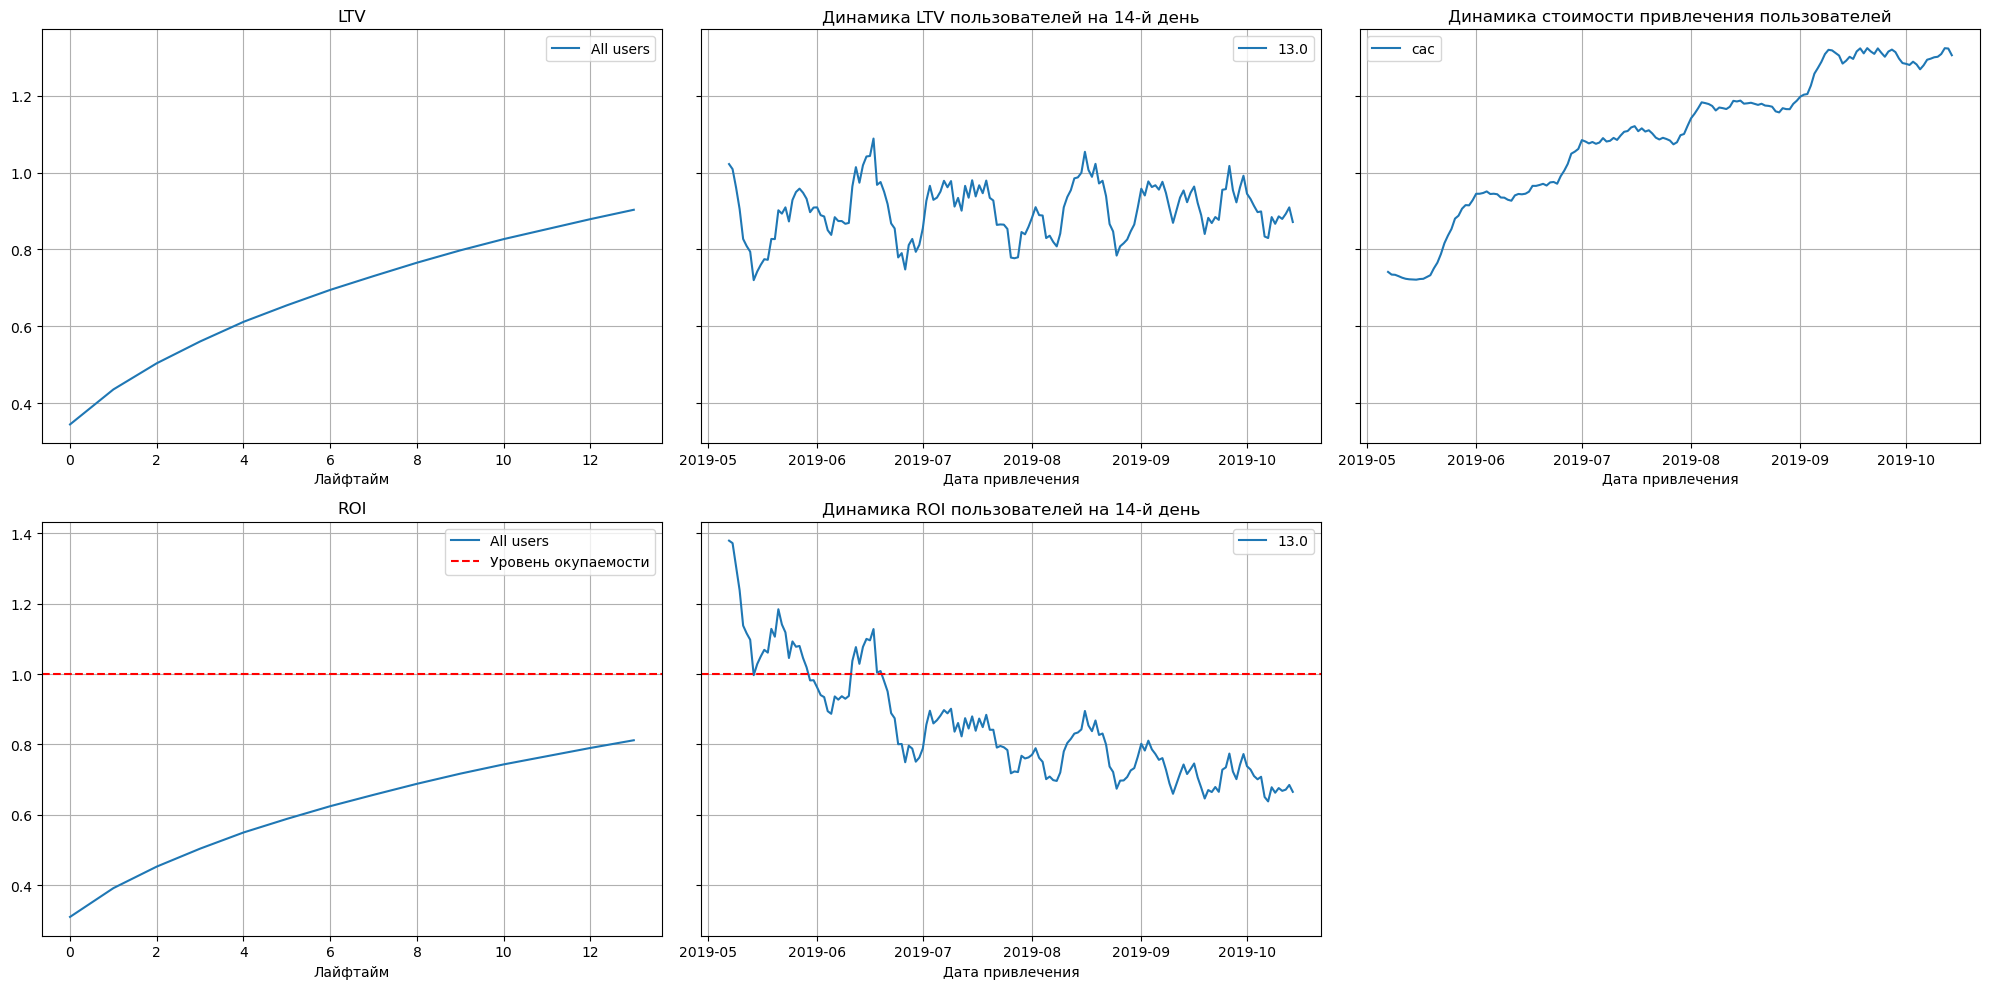

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По этим графикам можно сделать следующие выводы:
- Реклама не окупается. ROI в конце горизонта анализа едва достигает 80%.
- CAC постоянно растёт. Возможно, проблема в избыточном увеличении рекламного бюджета. 
- LTV стабильно растёт, но без значительных скачков. 
Чтобы понять, почему так происходит, изучим все характеристики пользователей. 

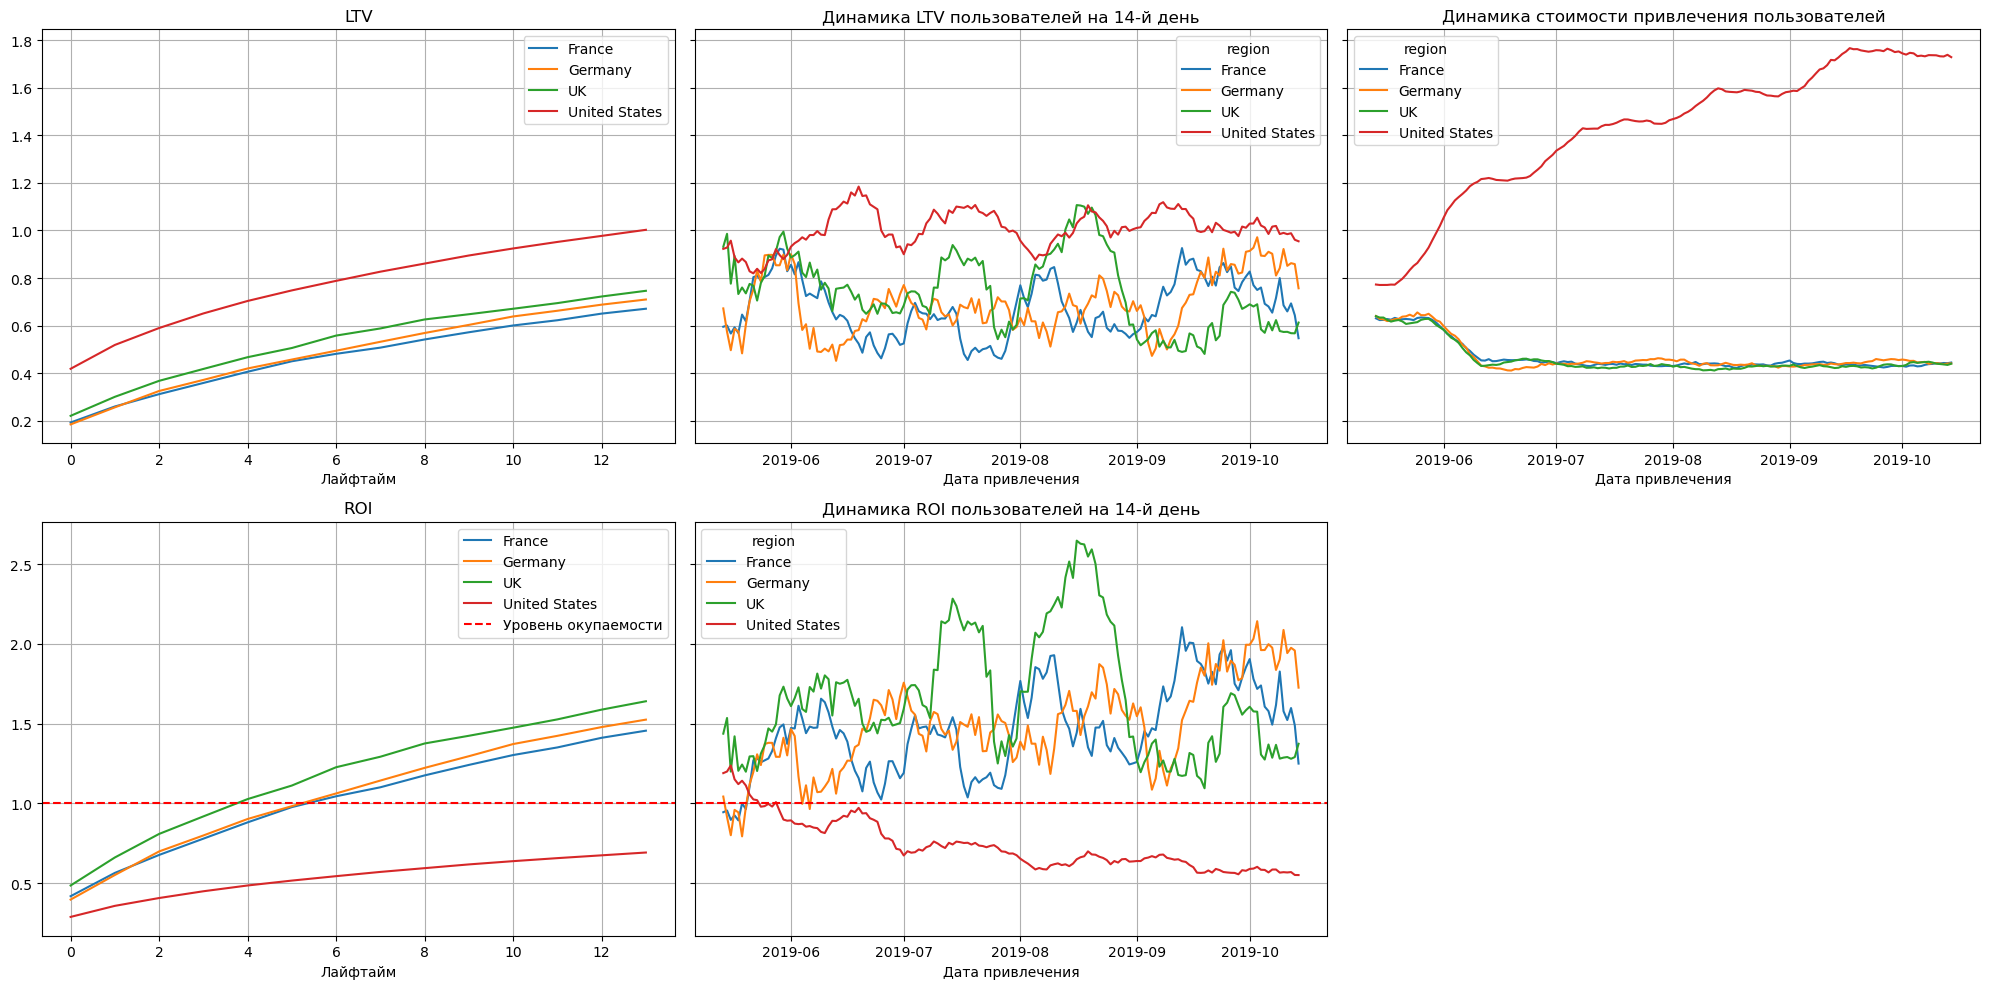

In [41]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В разбивке по странам ситуация не самая плохая. 
- Реклама окупается во всех странах, кроме США
- В последнее время динамика стоимости привлечения во всех странах стабильна, но в США резко и очень сильно возросла
- При этом LTV в США выше, чем в других регионах
- Пользователи из США удерживаются хуже всего.

Рассмотрим окупаемость с разбивкой по источникам привлечения.

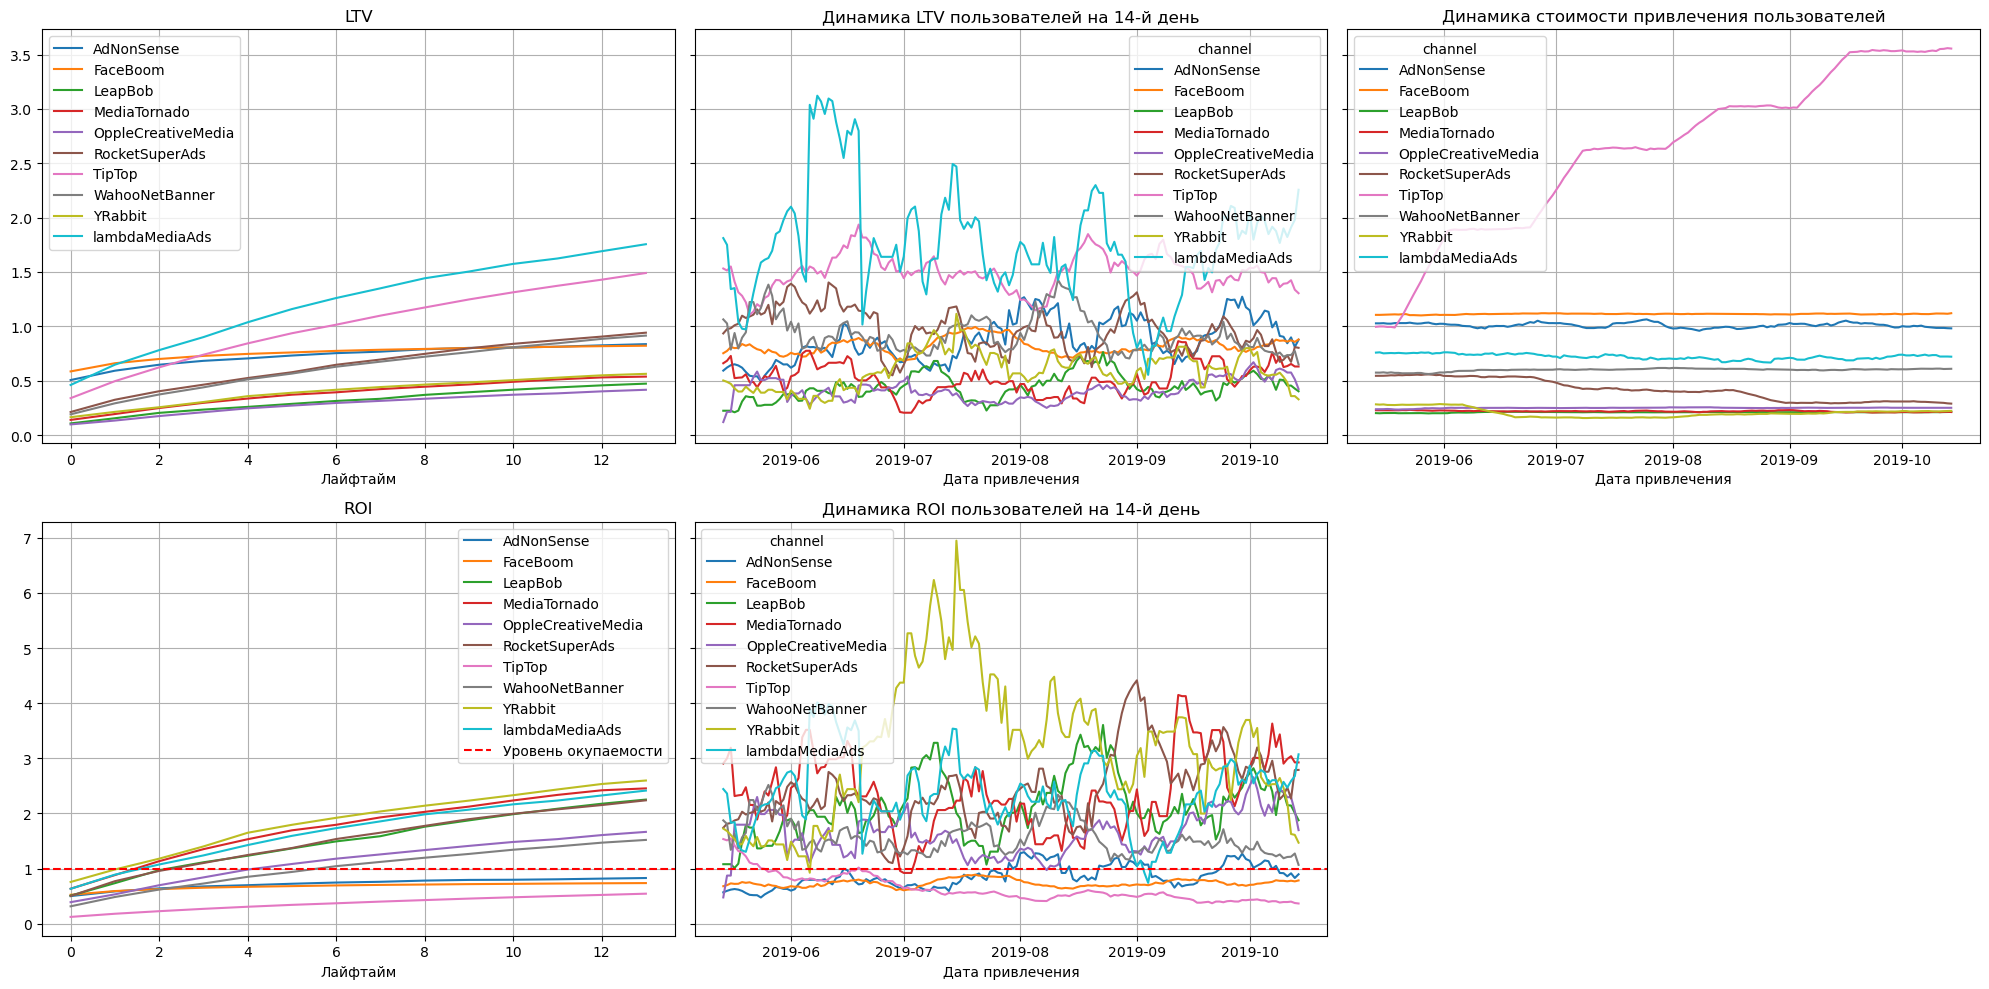

In [42]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- По LTV уверенно лидирует LambdaMediaAds и в общем рассмотрении, и на 14 день
- Стоимость привлечения пользователей стабильна везде, кроме TipTop - здесь стоимость привлечения пользователей стремительно растёт. 
- По ROI платформа TipTop находится ниже всех и даже не приближается к уровню окупаемости. Также проблемы наблюдаются с FaceBoom и AdNonSense.

Рассмотрим разбивку по устройствам.

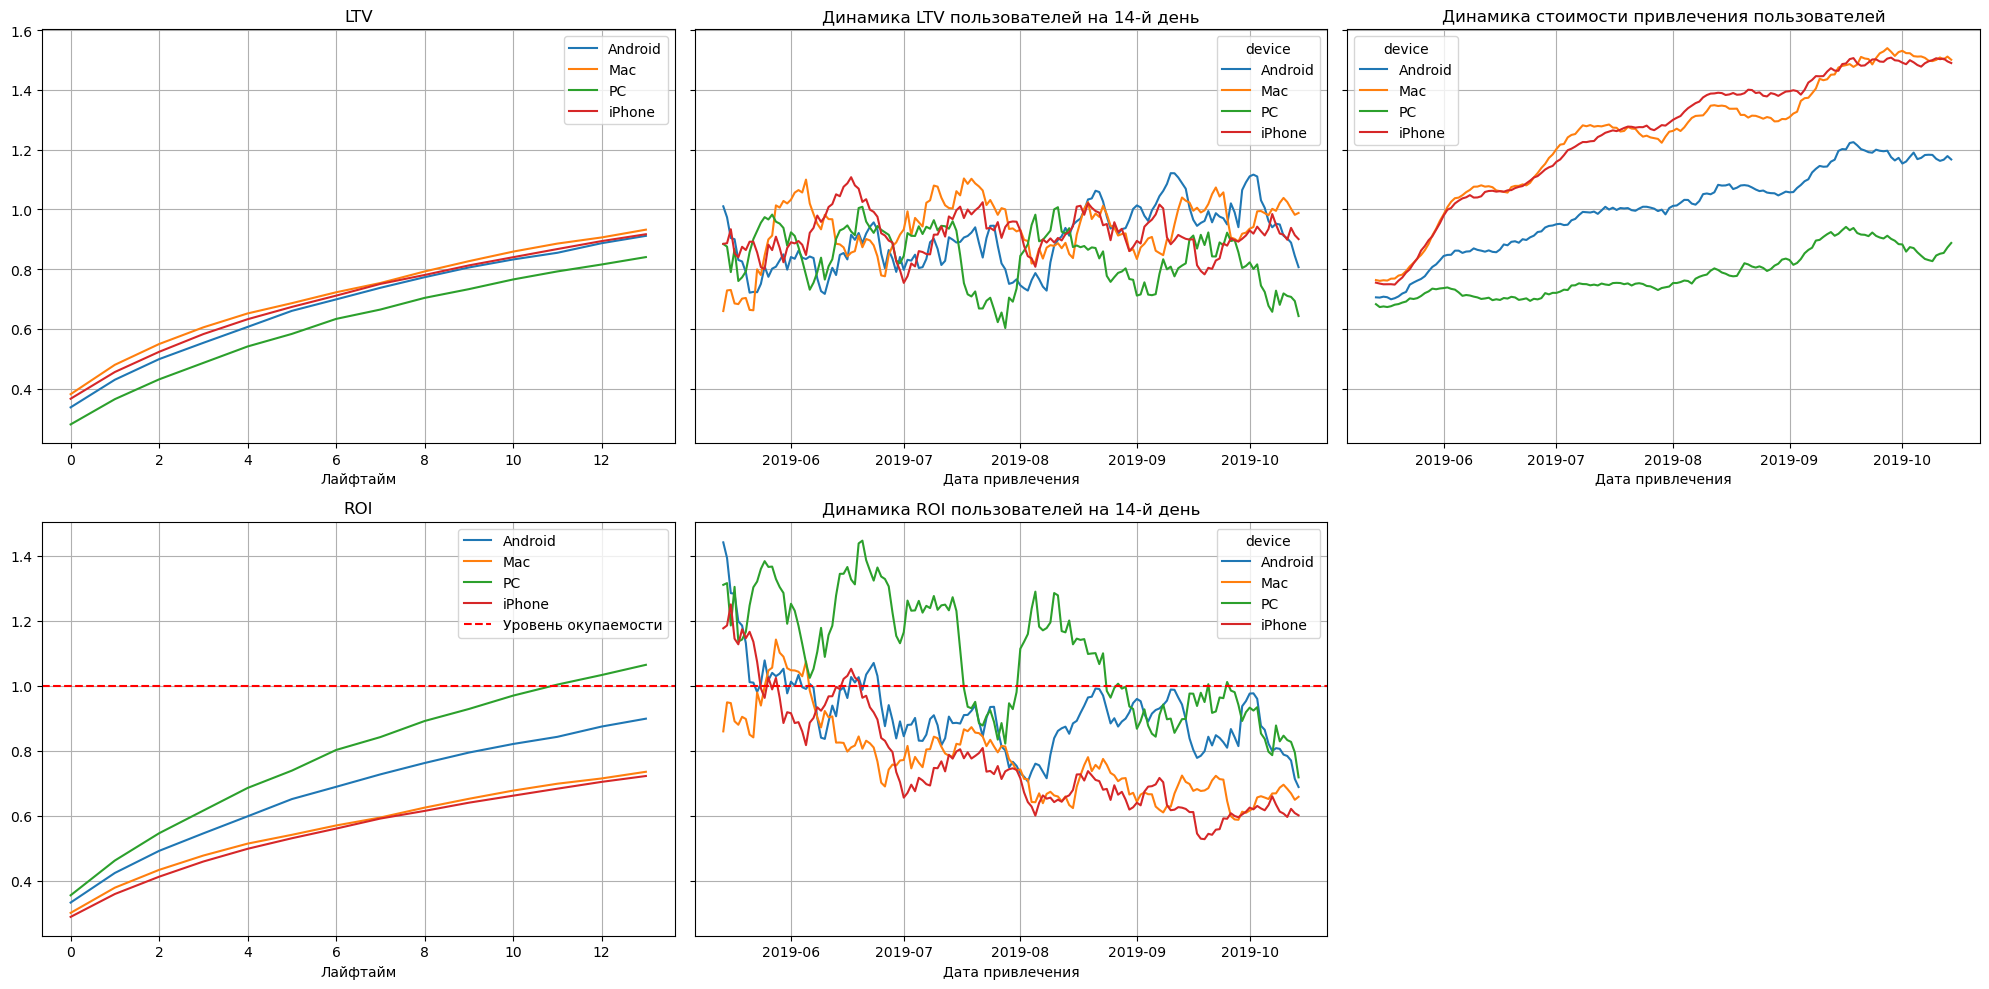

In [43]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Все устройства показывают стабильный рост LTV.
- Стоимость привлечения пользователя растёт на Mac и iPhone
- По ROI Mac и iPhone дальше всего от уровня окупаемости
- На 14 день все ROI снижаются ниже уровня окупаемости. 

Логично рассмотреть конверсию и удержание в разбивке по регионам: в остальных параметрах аномалий не наблюдается. 

Изучим, в чём может быть причина: проблемы в низкой конверсии или низком удержании. 

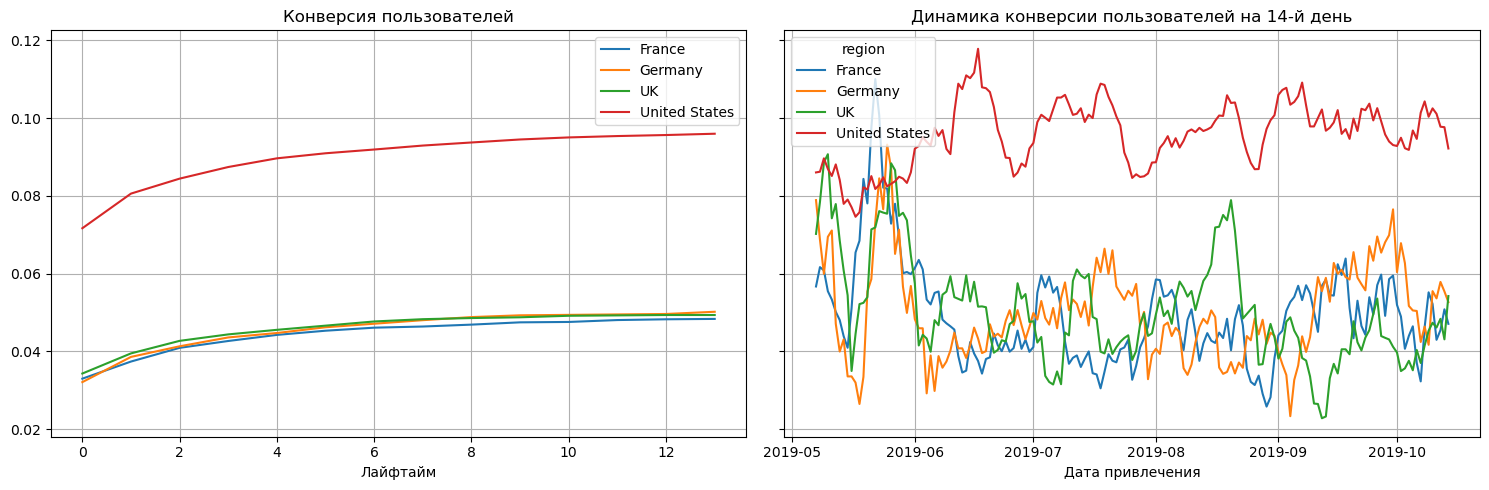

In [44]:
# смотрим конверсию с разбивкой по платформам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия у пользователей из США очень хорошая, проблем не наблюдается. Она значительно выше, чем у других регионов. 

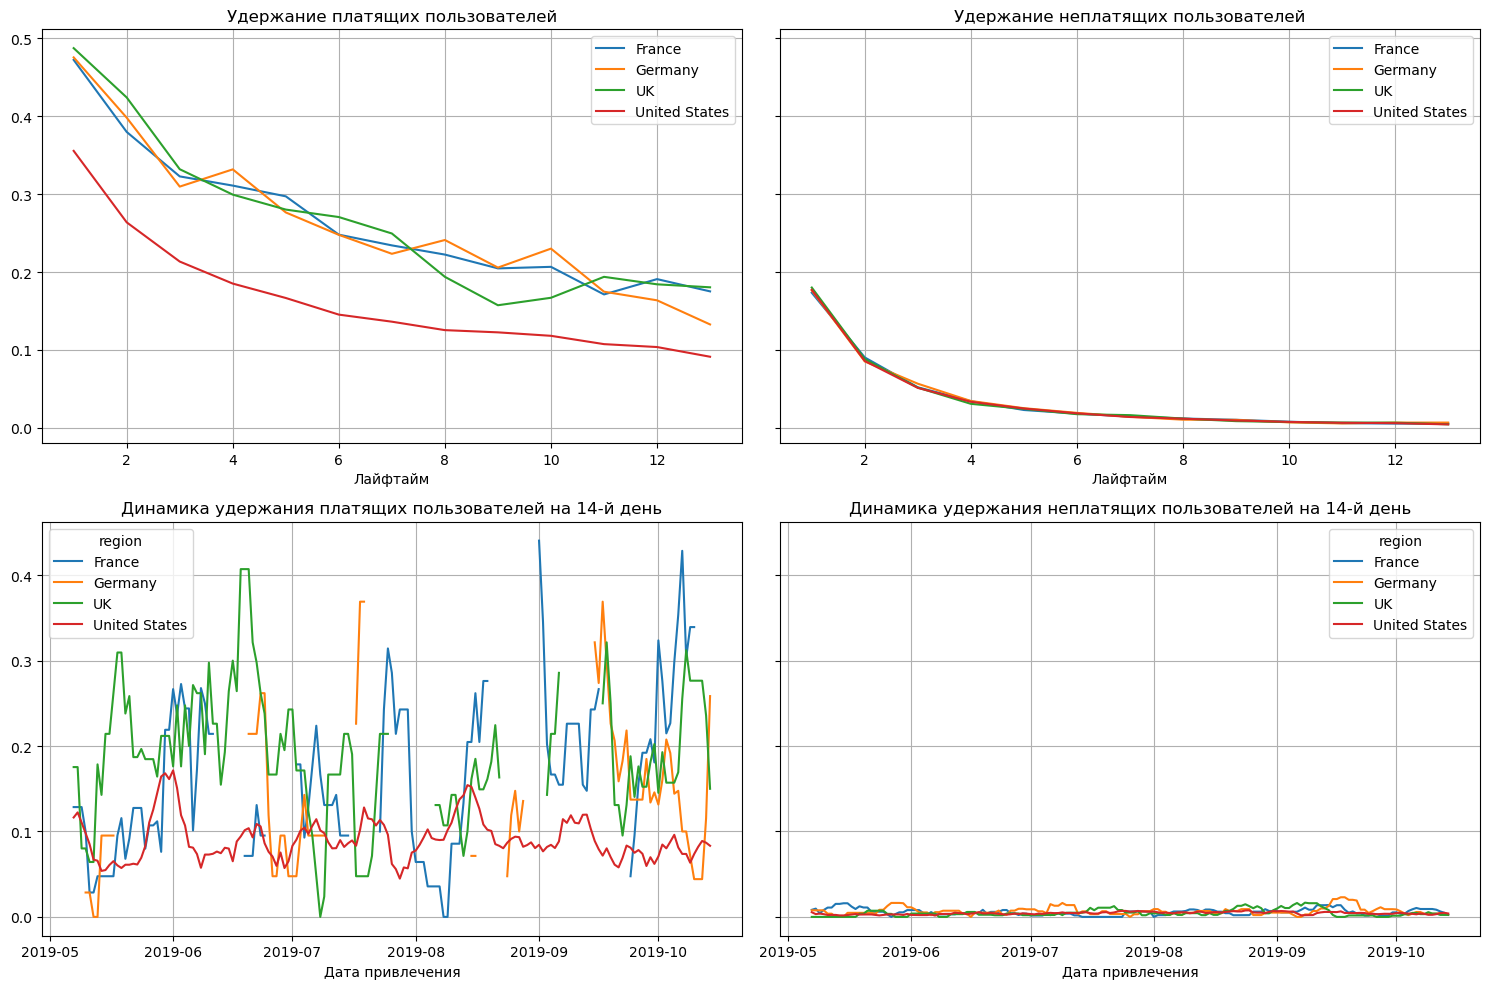

In [45]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

А вот удержание для пользователей из США достаточно низкое. Причём удержание неплатящих пользователей для всех платформ движется почти одинаково, а удержание платящих конкретно у пользователей из США ощутимо ниже. Возможно, причина в технической проблемой, с которой пользуются именно пользователи из США.  

Рассчитаем удержание и конверсию также и в разбивке по устройствам и каналам. 

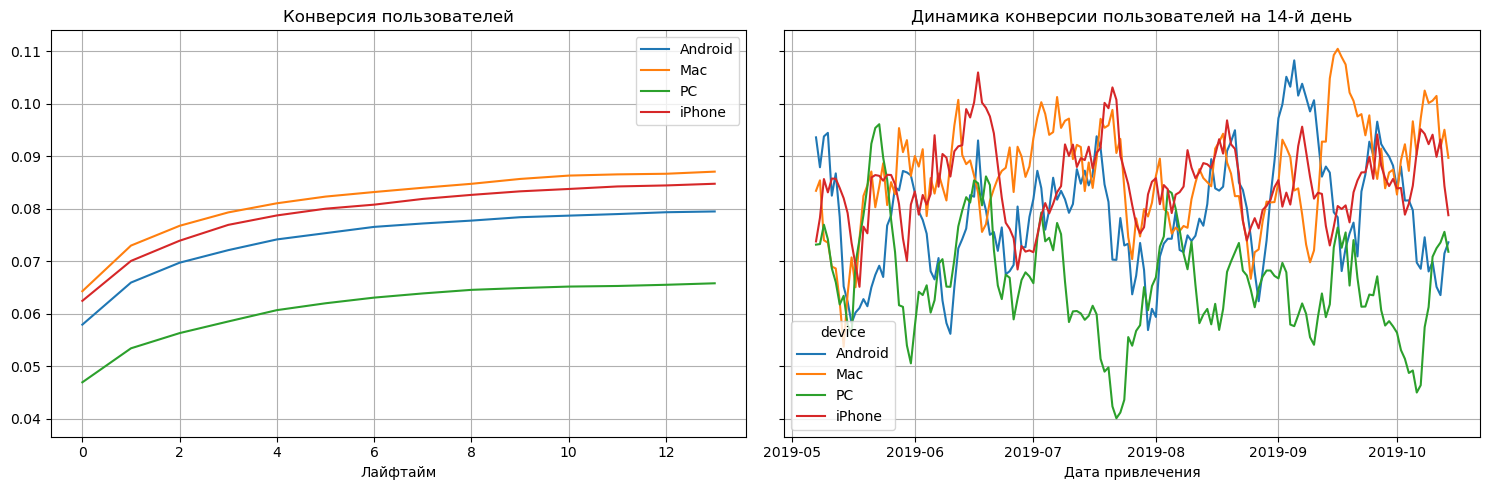

In [46]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В разбивке по устройствам продукция Apple показывает лучшую конверсию. Худшие показатели у пользователей PC.

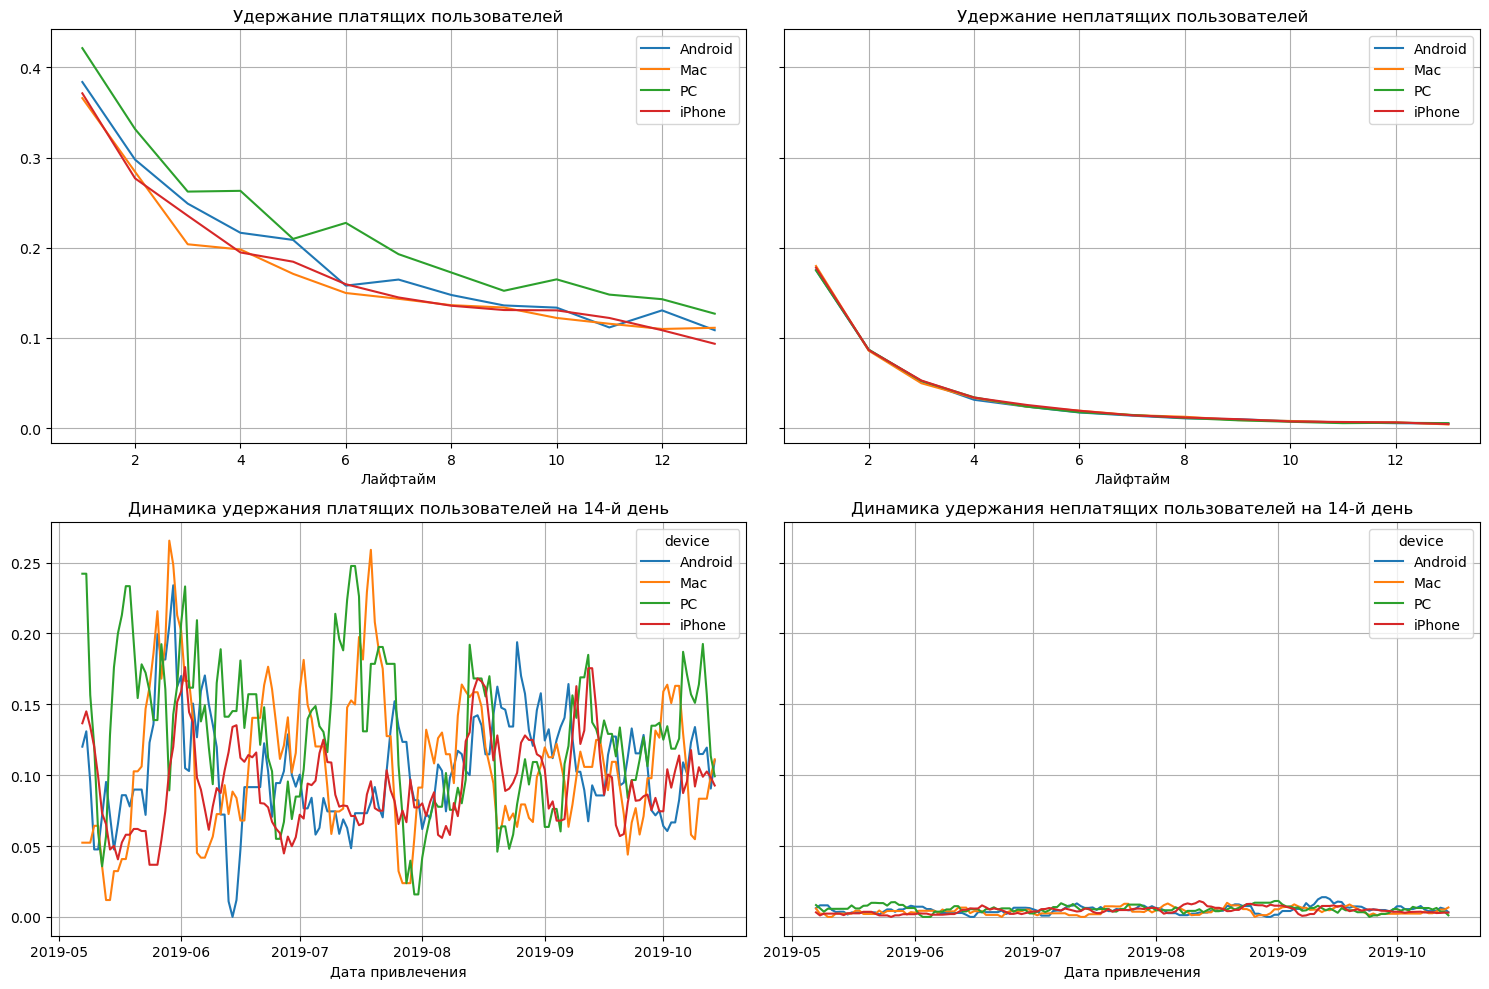

In [47]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Несмотря на более низкую конверсию, пользователи ПК удерживаются лучше. По этому параметру iPhone и Mac отстают. 

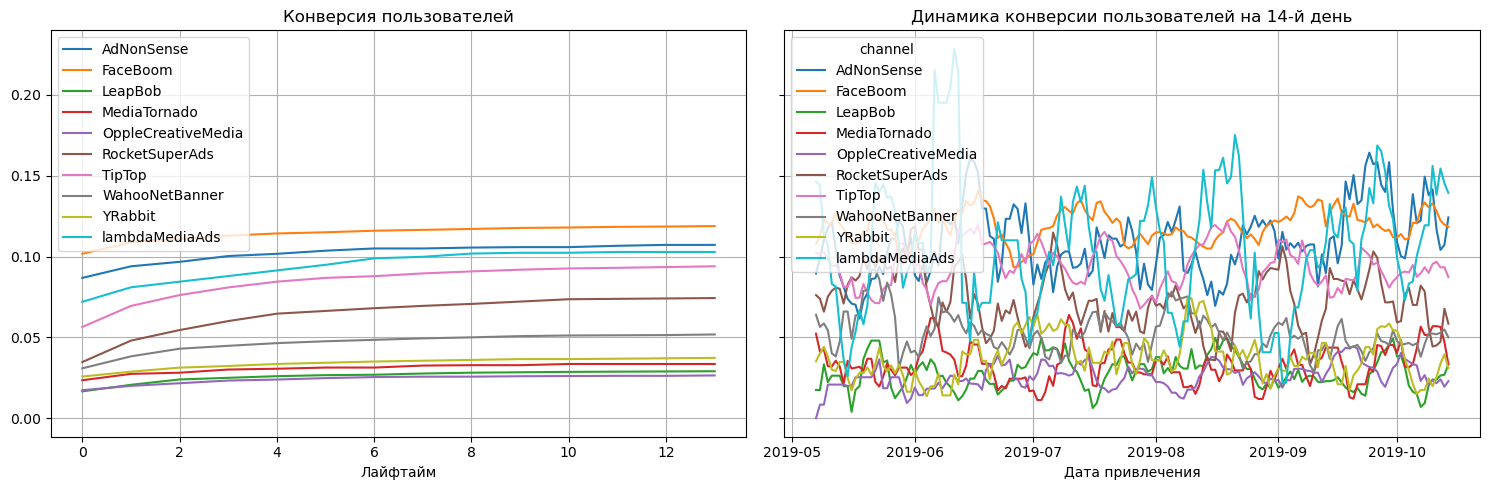

In [48]:
# смотрим конверсию с разбивкой по каналам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия лучше всего у платформ Faceboom и AdNonSense, на этих графиках не наблюдается проблем и аномалий.

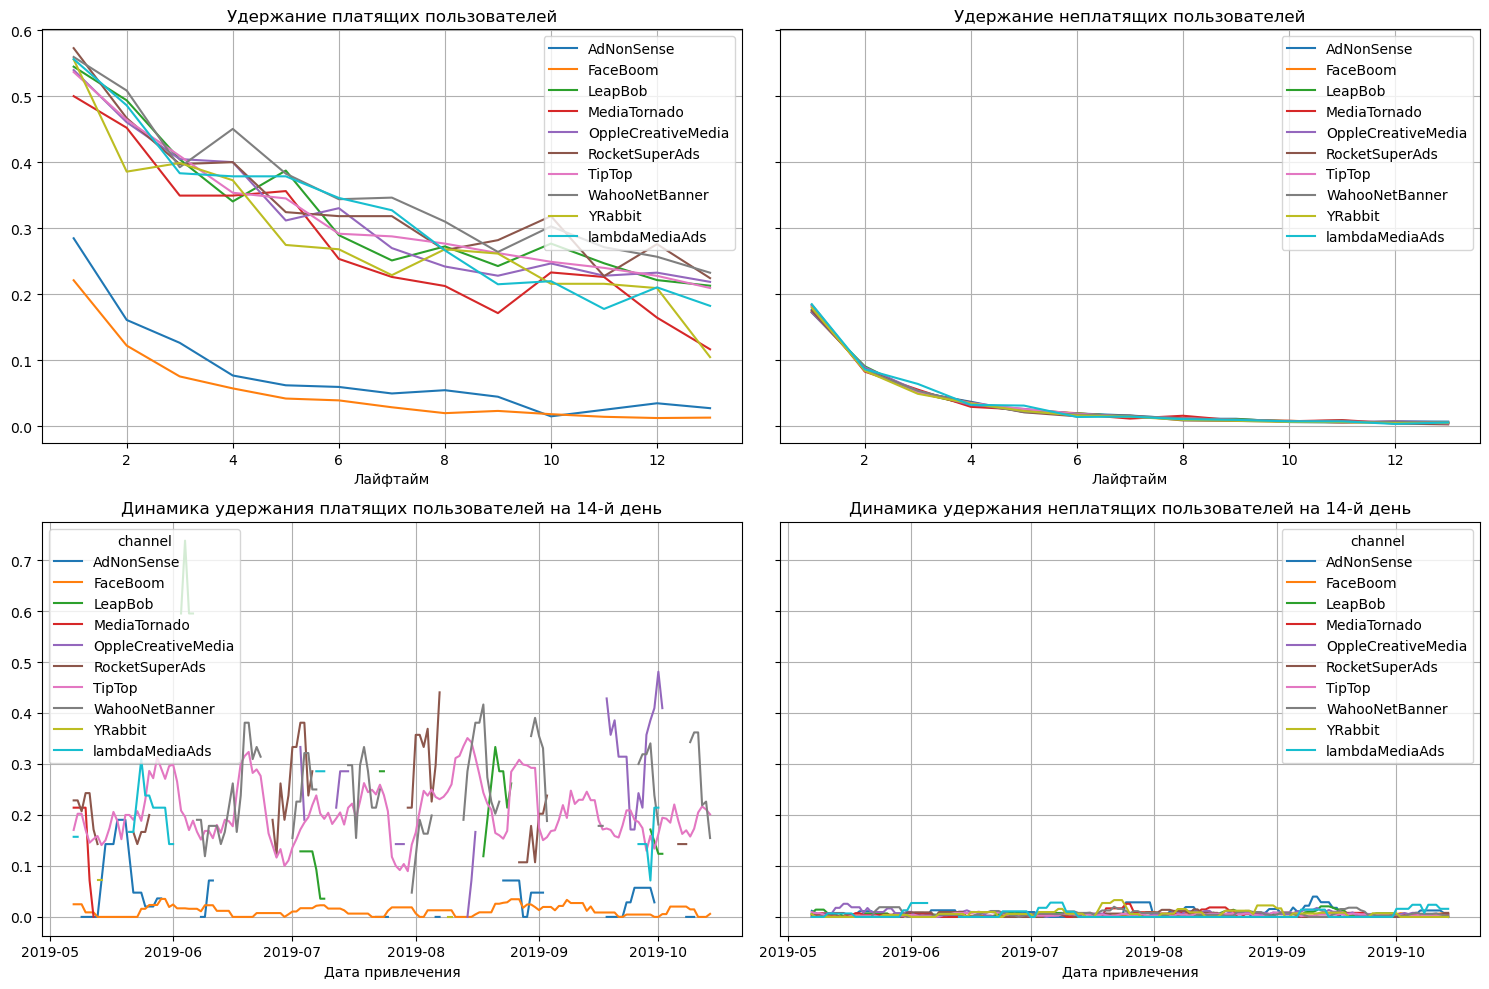

In [49]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

В удержании AdNonSense и Faceboom имеют худшие показатели. При достаточно высокой конверсии пользователи из этих источников плохо удерживаются. Нужно проверить, что не так.

### Промежуточный вывод
В изначальном анализе по различным параметрам установлено, что:
- Реклама не окупается. ROI в конце периода едва достигает 80%.
- CAC постоянно растёт. Возможно, проблема в избыточном увеличении рекламного бюджета. 
- LTV стабильно растёт, но без значительных скачков.
В детализированной разбивке выяснилось, что:
- Реклама имеет неплохую окупаемость во всех странах, кроме США. В этом регионе лучшая конверсия и худшее удержание.
- Mac и iPhone сильнее всего выросли в цене привлечения пользователя, и дальше всего от уровня окупаемости. 
- Разбивка по каналам привлечения показывает, что у AdNonSense и FaceBoom очень низкое удержание платящих пользователей на 14 день. Значительно ниже, чем у других каналов привлечения. 

Возможно, есть технические проблемы у пользователей из США. Необходимо проверить эту версию. Также нужно перепроверить рекламные кампании на каналах AdNonSense и Faceboom, и проверить, нормально ли работает приложение и оплата контента на устройствах от Apple. 

## Общий вывод
В ходе исследовательского анализа данных было установлено, что:
- Больше всего новых пользователей в приложение пришло из США, а в этом же регионе наиболее высокая доля платящих пользователей.
- Большинство пользователей используют iPhone, большинство платящих пользователей используют iPhone и Mac. Любопытно, что по количеству пользователей Mac меньше всего - 30 042, почти в два раза меньше, чем пользователей iPhone, но доля платящих пользователей даже немного выше.
- Больше всего пользователей были привлечены органически, но конверсия у них самая низкая. Самые платящие пользователи пришли через канал FaceBoom.

В ходе маркетингового анализа данных установлено, что всего на маркетинг затрачено 105 497, инвестиции распределяются достаточно неравномерно, наибольшие финансовые вливания получает платформа TipTop. На втором месте FaceBoom. 

В оценке окупаемости рекламы выявлена потенциальная проблема с пользователями из США и пользователями продукции Apple. Наибольшего внимания требуют пользователи из США: при достаточно высоких конверсиях они имеют очень низкие показатели удержания. Причём удержание платящих пользователей снижается по сравнению с остальными больше, чем неплатящих. Также требуют внимания кампании на платформах Faceboom и AdNonSense - при высокой конверсии они показывают достаточно слабое удержание.  

### Рекомендации для отдела маркетинга
Во-первых, необходимо связаться с разработчиками и запросить статистику происшествий. Возможно, есть какие-то технические проблемы у платящих пользователей из США, и у пользователей Mac и iPhone. Нужно выгрузить данные и проверить эту версию. 

Во-вторых, стоит пересмотреть инвестиционную политику: на данный момент огромные инвестиции получает платформа TipTop, но конверсии, удержание и все показатели у этой платформы не слишком высокие. Гораздо лучшую окупаемость показывает FaceBoom. 

В-третьих, нужно проверить кампании на платформах Faceboom и AdNonSense: они показывают слабое удержание при высокой конверсии. 